# Handle Image

In [56]:
import cv2

In [57]:
img = cv2.imread('face.jpg')

In [58]:
img.shape

(504, 450, 3)

In [59]:
img = cv2.resize(img, (200, 200))
img.shape

(200, 200, 3)

In [60]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
img_gray.shape

(200, 200)

# Convolution

In [61]:
import numpy as np

In [85]:
class Conv2d:
    def __init__(self, img_input, numOfKernel:int = 8, kernalSize: int = 3, padding: int = 0, stride: int = 1): # kernalSize must %2 != 0
        self.img_input = np.pad(img_input,((padding, padding), (padding, padding)), 'constant') # add padding
        self.height, self.width = img_input.shape
        self.stride = stride
        self.kernal = np.random.randn(numOfKernel, kernalSize, kernalSize)
        self.kernalSize = kernalSize
        # image layer tail
        self.results = np.zeros( ((self.height - kernalSize)//self.stride + 1, \
                                (self.width - kernalSize)//self.stride + 1, \
                                self.kernal.shape[0]))
    
    def getROI(self):
        for row in range((self.height - self.kernalSize)//self.stride + 1):
            for col in range((self.width - self.kernalSize)//self.stride + 1):
                roi = self.img_input[row*self.stride:row*self.stride+self.kernalSize, col*self.stride:col*self.stride+self.kernalSize]
                yield row, col, roi
                
    def operate(self):
        for layer in range(self.kernal.shape[0]):
            for row, col, roi in self.getROI():
                self.results[row, col, layer] = np.sum(roi * self.kernal[layer])
        return self.results
    

In [63]:
import matplotlib.pyplot as plt

(196, 196)


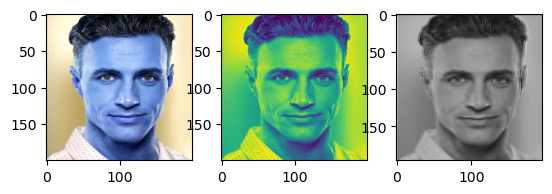

In [64]:
np.random.seed(200)
conv2d = Conv2d(img_gray, 5, padding=2, stride=1)
img_gray_conv2d = conv2d.operate()

print(img_gray_conv2d.shape)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(img_gray)
plt.subplot(1, 3, 3)
plt.imshow(img_gray_conv2d, cmap = 'gray')
plt.show()

# Active function ReLu

In [91]:
class Relu:
    def __init__(self, input):
        self.input = input
        self.results = np.zeros((self.input.shape[0], self.input.shape[1], self.input.shape[2]))
        
    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.input.shape[0]):
                for col in range(self.input.shape[1]):
                    self.results[row, col, layer] = 0 if self.input[row, col, layer] < 0 else self.input[row, col, layer]
                
        return self.results
                

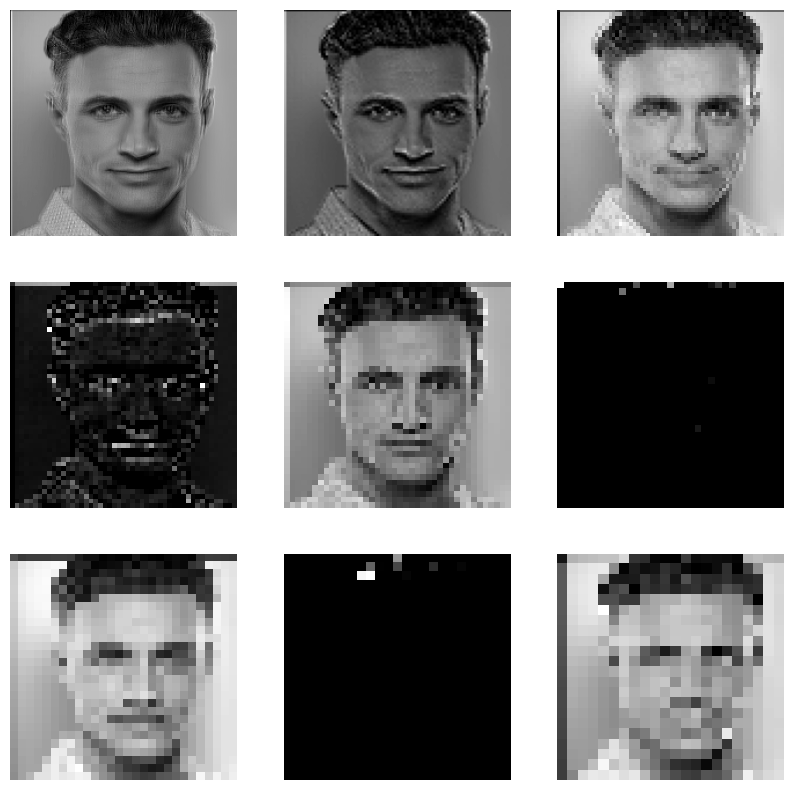

In [77]:
np.random.seed(200)
fig = plt.figure(figsize=(10, 10))
for i in range(1, 10):
    conv2d = Conv2d(img_gray, 5, padding=2, stride=i)
    img_gray_conv2d = conv2d.operate()
    conv2d_relu = Relu(img_gray_conv2d)
    img_gray_conv2d_relu = conv2d_relu.operate()
    plt.subplot(3, 3, i)
    plt.imshow(img_gray_conv2d_relu, cmap ='gray')
    plt.axis('off')

plt.show()

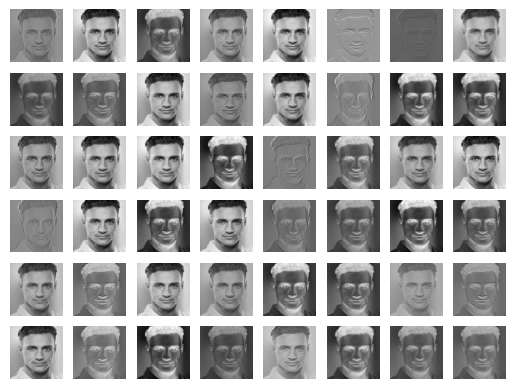

In [90]:
# mutil layer
np.random.seed(200)
conv2d = Conv2d(img_gray, 48, 3, padding=0, stride=1)
img_gray_conv2d = conv2d.operate()


#fig = plt.figure(figsize=(10, 10))
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(img_gray_conv2d[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

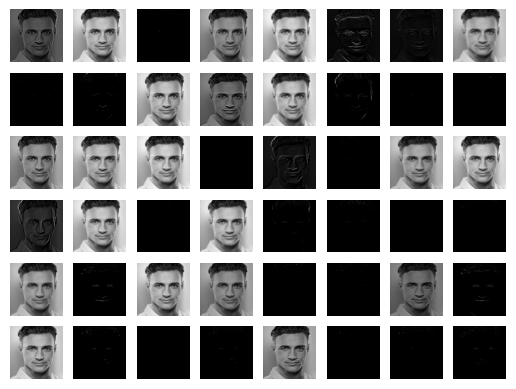

In [92]:
# mutil layer use relu
np.random.seed(200)
conv2d = Conv2d(img_gray, 48, 3, padding=0, stride=1)
img_gray_conv2d = conv2d.operate()
img_gray_conv2d_relu = Relu(img_gray_conv2d).operate()

#fig = plt.figure(figsize=(10, 10))
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(img_gray_conv2d_relu[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

# Leaky Relu

In [93]:
class LeakyRelu:
    def __init__(self, input):
        self.input = input
        self.results = np.zeros((self.input.shape[0], self.input.shape[1], self.input.shape[2]))
        
    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.input.shape[0]):
                for col in range(self.input.shape[1]):
                    self.results[row, col, layer] = 0.1*self.input[row, col, layer] if self.input[row, col, layer] < 0 else self.input[row, col, layer]
                
        return self.results

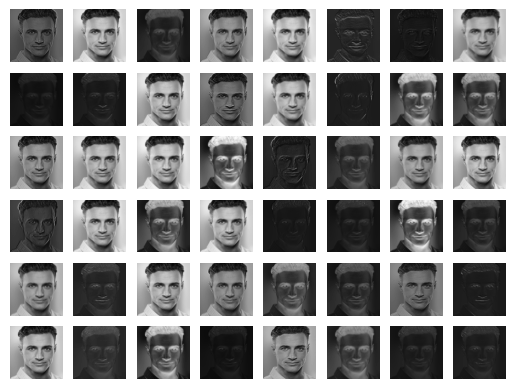

In [94]:
# mutil layer use relu
np.random.seed(200)
conv2d = Conv2d(img_gray, 48, 3, padding=0, stride=1)
img_gray_conv2d = conv2d.operate()
img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()

#fig = plt.figure(figsize=(10, 10))
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(img_gray_conv2d_leakyrelu[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

# Pooling

In [99]:
class MaxPooling:
    def __init__(self, input, poolingSize: int = 2):
        self.input = input
        self.poolingSize = poolingSize
        self.results = np.zeros((self.input.shape[0]//self.poolingSize, 
                                 self.input.shape[1]//self.poolingSize,
                                 self.input.shape[2]))
    def operate(self):
        for layer in range(self.input.shape[2]):
            for row in range(self.results.shape[0]):
                for col in range(self.results.shape[1]):
                    self.results[row, col, layer] = np.max(self.input[row*self.poolingSize:row*self.poolingSize + self.poolingSize,
                                                               col*self.poolingSize:col*self.poolingSize + self.poolingSize,
                                                               layer])
        return self.results
        

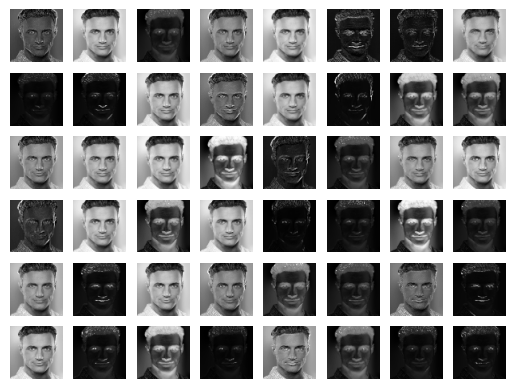

In [100]:
# pooling
np.random.seed(200)
conv2d = Conv2d(img_gray, 48, 3, padding=0, stride=1)
img_gray_conv2d = conv2d.operate()
img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()
img_gray_conv2d_leakyrelu_maxpooling = MaxPooling(img_gray_conv2d_leakyrelu, 3).operate()

#fig = plt.figure(figsize=(10, 10))
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(img_gray_conv2d_leakyrelu_maxpooling[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

# Repeat Convolution+Relu and Pooling

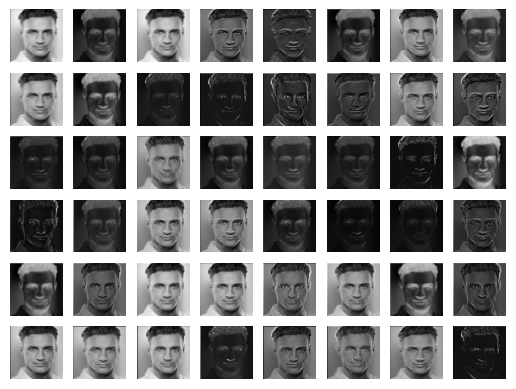

In [102]:
# repeat 
np.random.seed(200)
img_gray_conv2d = Conv2d(img_gray, 16, 3, padding=0, stride=1).operate()
img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()
img_gray_conv2d_leakyrelu_maxpooling = MaxPooling(img_gray_conv2d_leakyrelu, 3).operate()

img_gray_conv2d_L2 = Conv2d(img_gray, 48, 5, padding=2, stride=1).operate()
img_gray_conv2d_leakyrelu_L2 = LeakyRelu(img_gray_conv2d_L2).operate()
img_gray_conv2d_leakyrelu_maxpooling_L2 = MaxPooling(img_gray_conv2d_leakyrelu_L2, 2).operate()

#fig = plt.figure(figsize=(10, 10))
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(img_gray_conv2d_leakyrelu_maxpooling_L2[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

# Test New Image

In [104]:
img = cv2.imread('KhuonVien.jpg')
img.shape

(380, 720, 3)

In [105]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) / 255

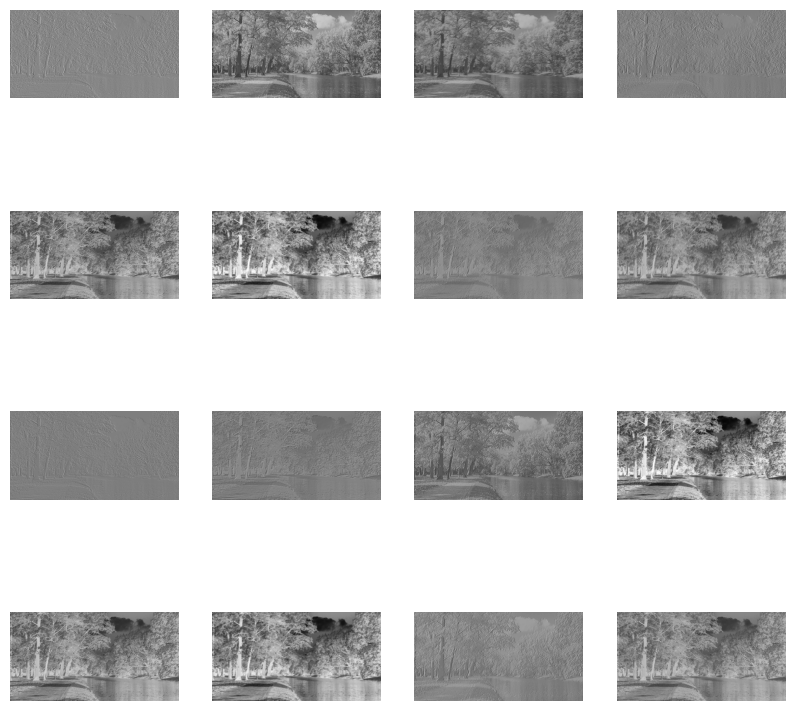

In [108]:
# convolution
np.random.seed(100)
img_gray_conv2d = Conv2d(img_gray, 16, 3, padding=0, stride=1).operate()
#img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()
#img_gray_conv2d_leakyrelu_maxpooling = MaxPooling(img_gray_conv2d_leakyrelu, 3).operate()

fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_gray_conv2d[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

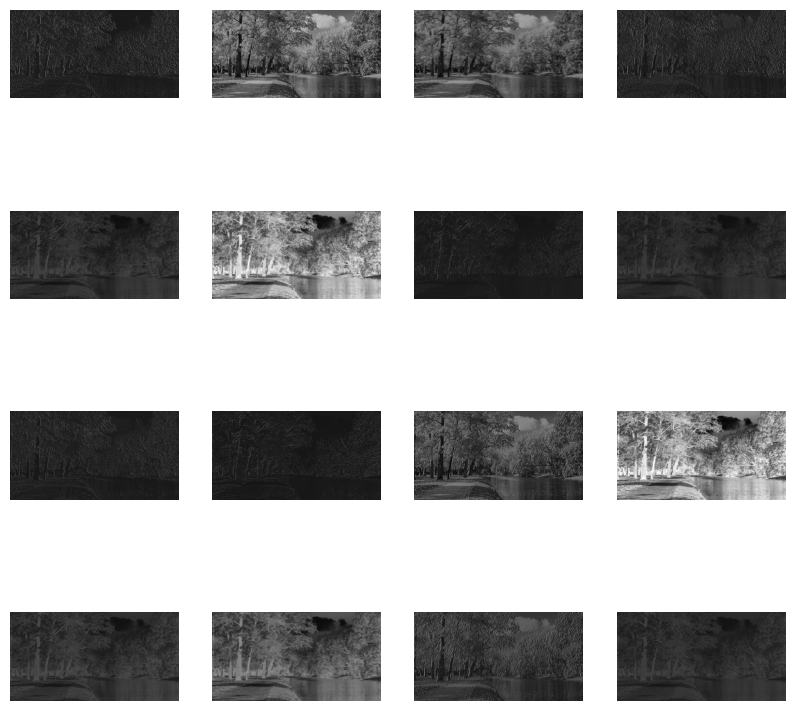

In [109]:
# Leaky ReLu
np.random.seed(100)
img_gray_conv2d = Conv2d(img_gray, 16, 3, padding=0, stride=1).operate()
img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()
#img_gray_conv2d_leakyrelu_maxpooling = MaxPooling(img_gray_conv2d_leakyrelu, 3).operate()

fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_gray_conv2d_leakyrelu[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()

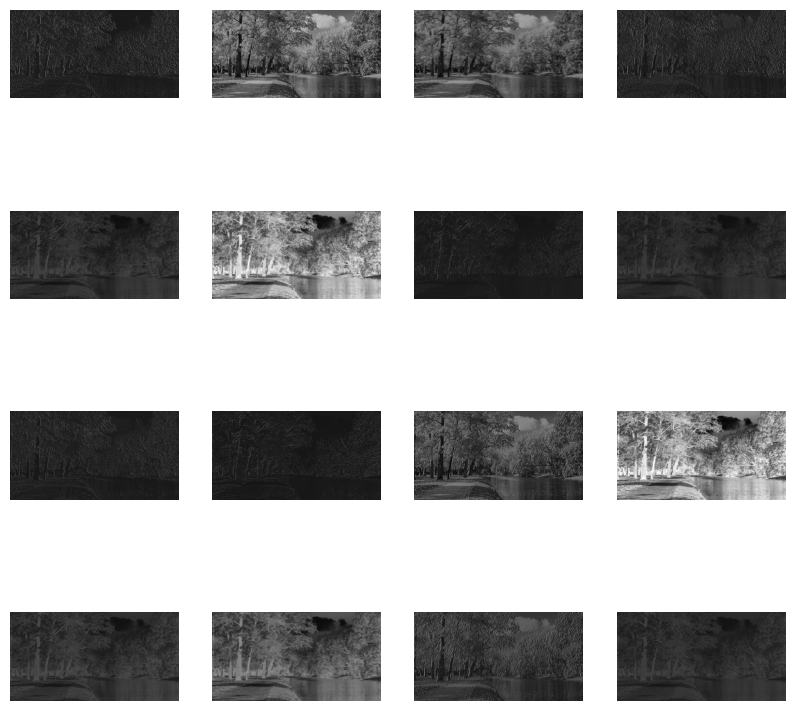

In [110]:
# Max Pooling
np.random.seed(100)
img_gray_conv2d = Conv2d(img_gray, 16, 3, padding=0, stride=1).operate()
img_gray_conv2d_leakyrelu = LeakyRelu(img_gray_conv2d).operate()
img_gray_conv2d_leakyrelu_maxpooling = MaxPooling(img_gray_conv2d_leakyrelu, 3).operate()

fig = plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img_gray_conv2d_leakyrelu[:, :, i], cmap ='gray')
    plt.axis('off')

plt.show()